<a href="https://colab.research.google.com/github/Abhi5503/2216200_AIML_Bootcamp_2023/blob/main/GenderClassification_genAI_assn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [7]:
df.duplicated().sum()

1768

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

<Axes: >

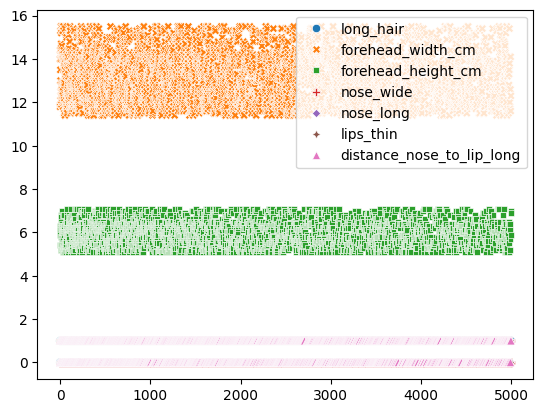

In [10]:
sns.scatterplot(df)

In [12]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

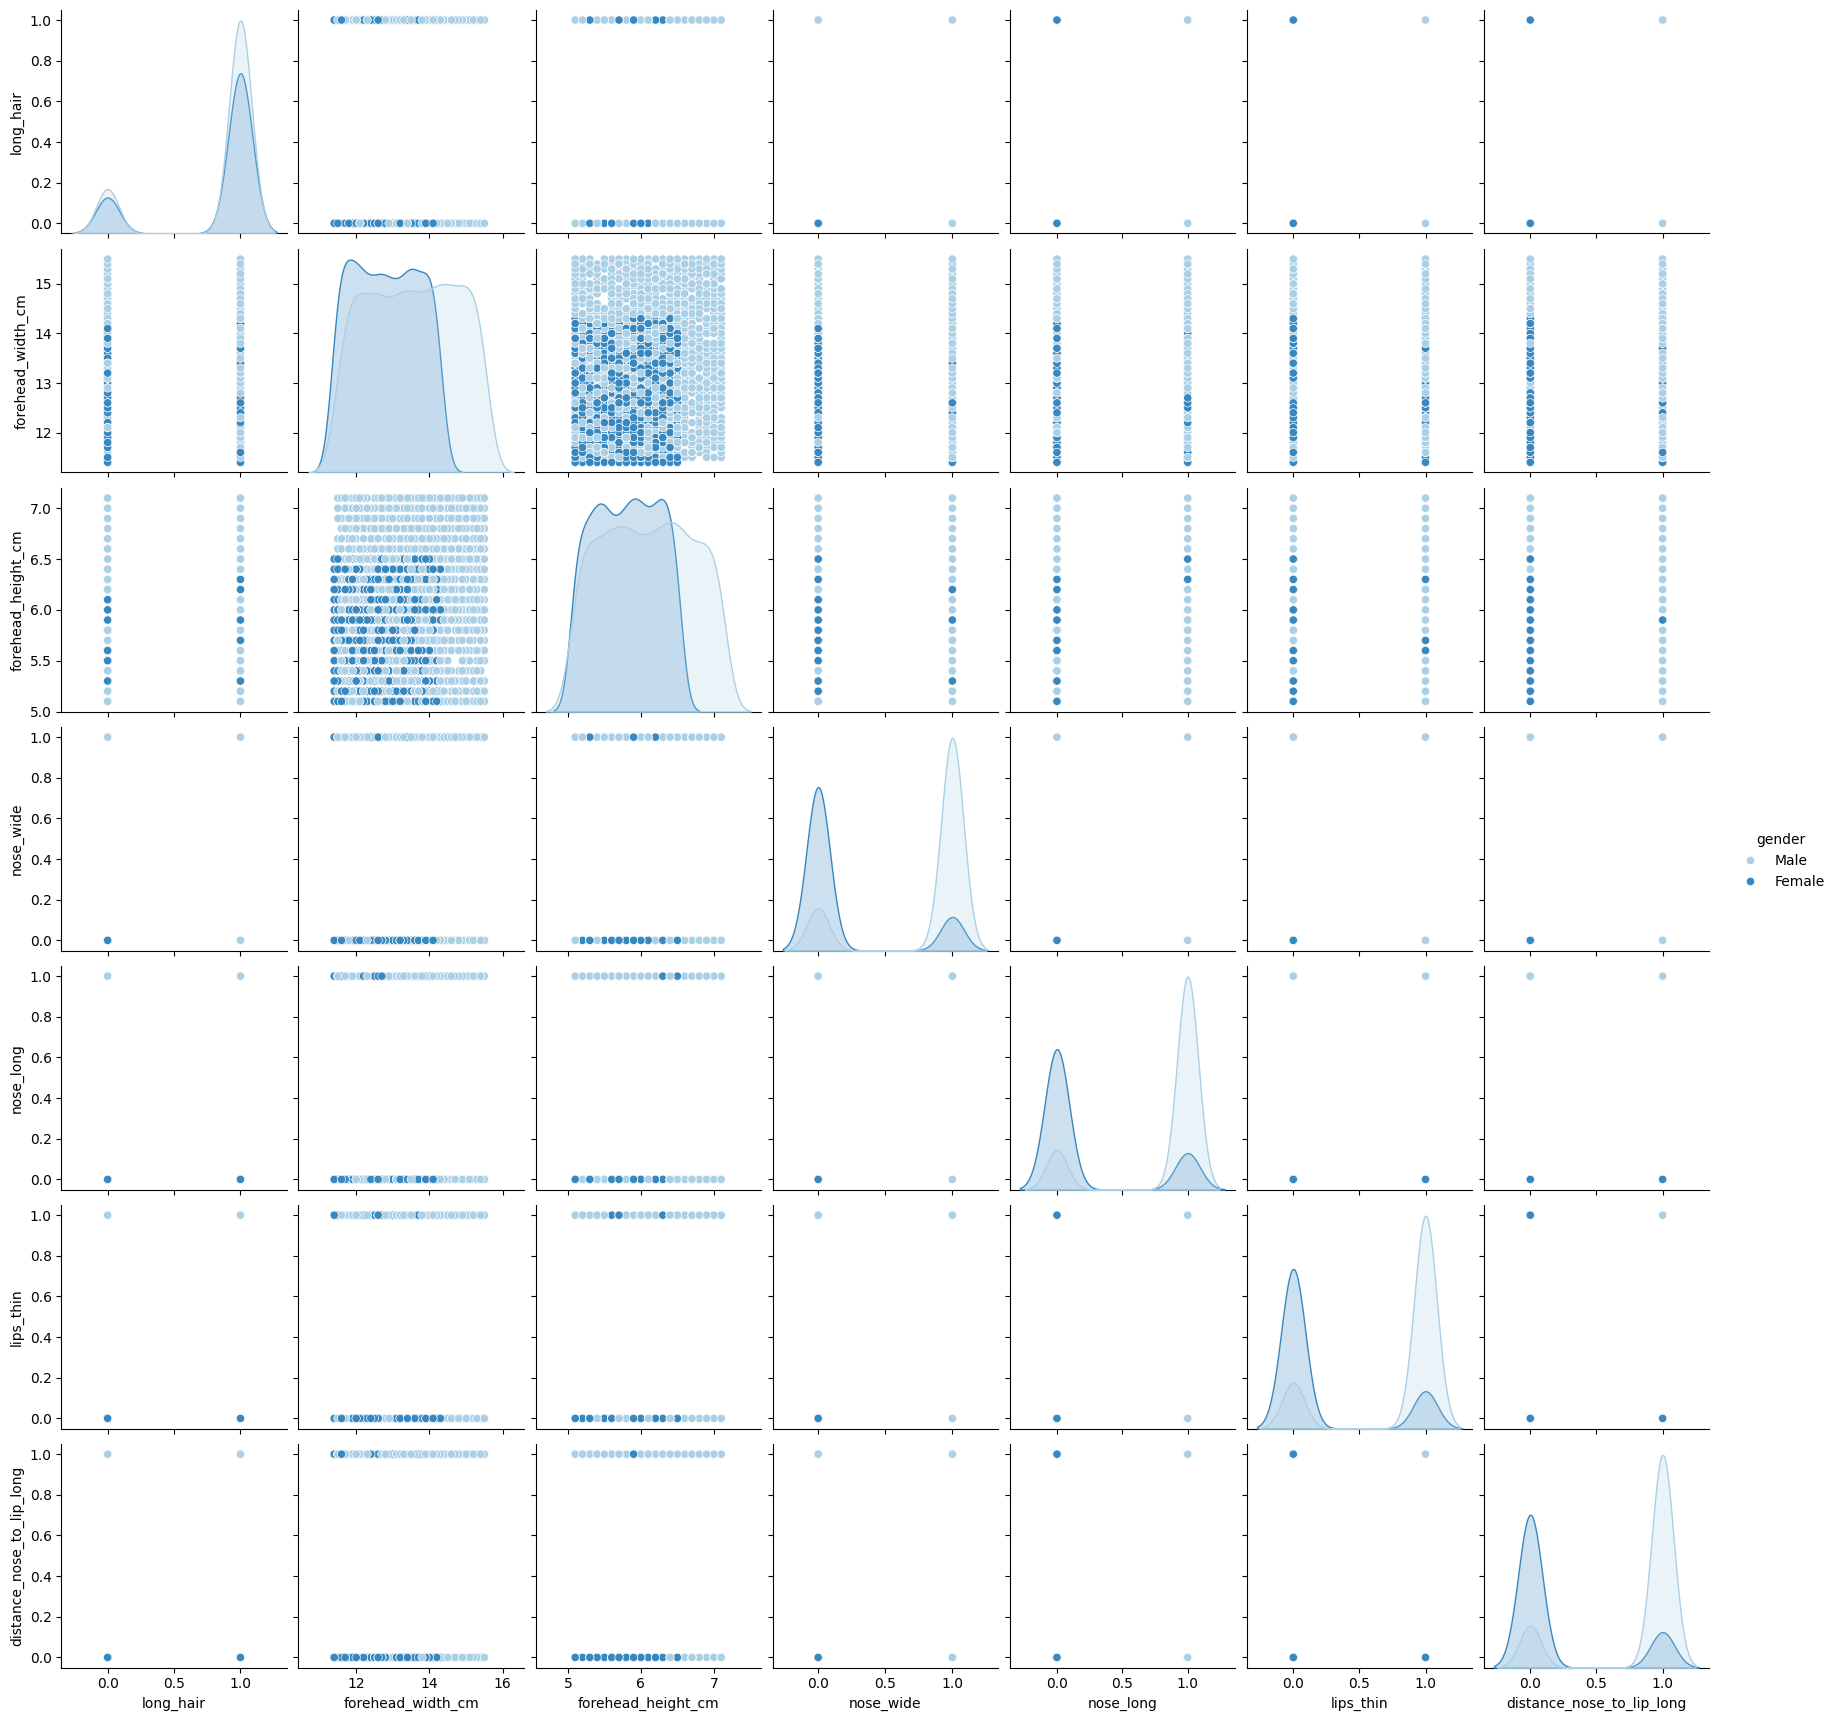

In [13]:
m_col=['long_hair','forehead_width_cm','forehead_height_cm','nose_wide',
       'nose_long','lips_thin','distance_nose_to_lip_long','gender']
sns.pairplot(df[m_col],hue='gender',palette='Blues')

In [14]:
twogender = {'Female':0, 'Male':1}
df['gender'] = df['gender'].map(twogender)

In [15]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score

In [17]:
x = df[df.columns[:-1]]
y = df['gender']

In [18]:
le=LabelEncoder()
y = le.fit_transform(y)

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42 )

In [20]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

Accuracy =  95.98  %
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       308
           1       0.96      0.96      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647




Text(0.5, 1.0, 'Logistic Regresstion Confusion Matrix')

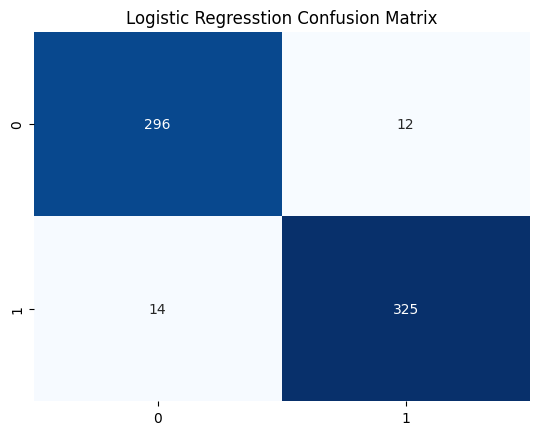

In [21]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,lr.predict(x_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)

print('Accuracy = ' , lr_test_acc,' %')
print("Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix')

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy =  94.13  %
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       308
           1       0.96      0.93      0.94       339

    accuracy                           0.94       647
   macro avg       0.94      0.94      0.94       647
weighted avg       0.94      0.94      0.94       647




Text(0.5, 1.0, 'K-Nearest Neighbors Confusion Matrix')

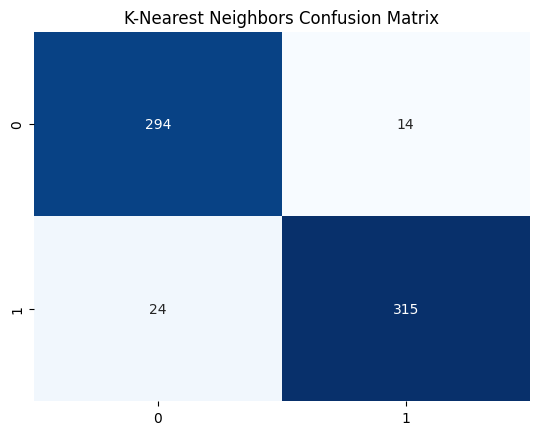

In [23]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
knn_train_acc = round(accuracy_score(y_train,knn.predict(x_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , knn_test_acc,' %')
print("Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('K-Nearest Neighbors Confusion Matrix')

In [24]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

Accuracy =  94.13  %
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       308
           1       0.95      0.95      0.95       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647




Text(0.5, 1.0, 'Tree Confusion Matrix')

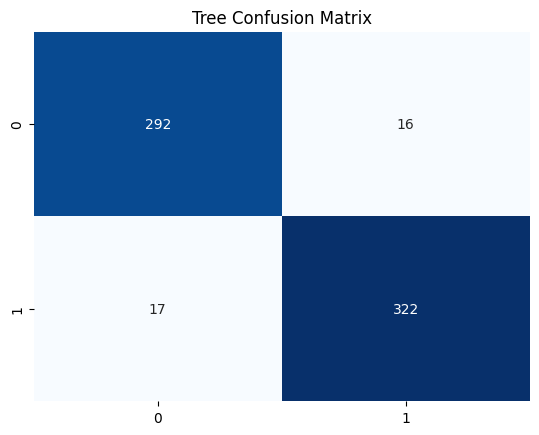

In [25]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
model_train_acc = round(accuracy_score(y_train,model.predict(x_train))*100,2)
model_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , knn_test_acc,' %')
print("Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Tree Confusion Matrix')

<ipython-input-26-4d80ef54a632>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_acc, y=model_name,palette='colorblind')


<Axes: >

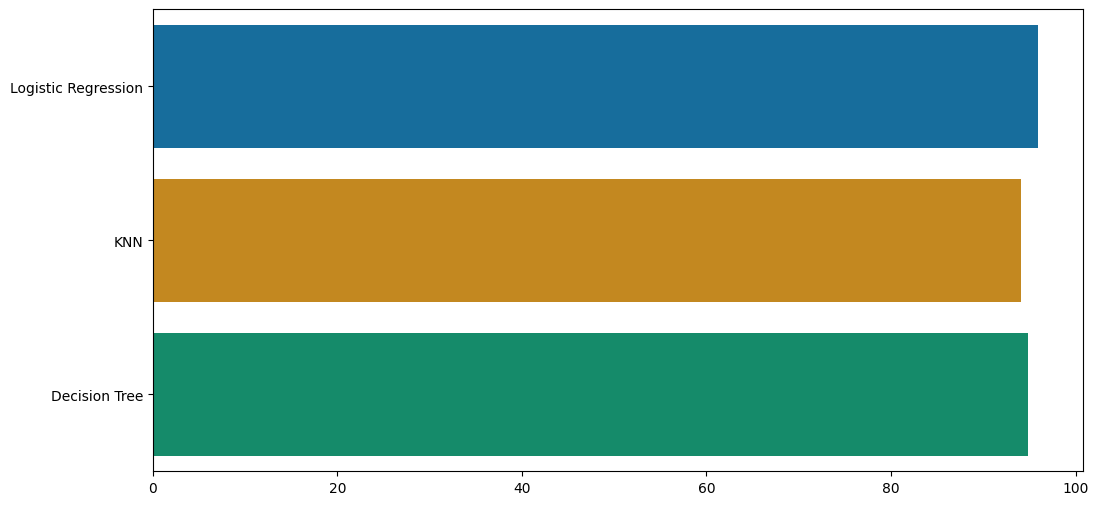

In [26]:
plt.figure(figsize=(12,6))
model_acc = [lr_test_acc,knn_test_acc,model_test_acc]
model_name = ['Logistic Regression','KNN','Decision Tree']
sns.barplot(x=model_acc, y=model_name,palette='colorblind')